In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [8]:
# 오바마 대통령의 취임문을 불러오는 코드
with open('/content/obama_p.txt', 'r') as f:
  speech_text = f.read()

In [9]:
# 불러온 텍스트를 print
print(speech_text)

My fellow citizens:
I stand here today humbled by the task before us, grateful for the trust you have bestowed, mindful of the sacrifices borne by our ancestors. I thank President Bush for his service to our nation, as well as the generosity and cooperation he has shown throughout this transition.
Forty-four Americans have now taken the presidential oath. The words have been spoken during rising tides of prosperity and the still waters of peace. Yet, every so often the oath is taken amidst gathering clouds and raging storms. At these moments, America has carried on not simply because of the skill or vision of those in high office, but because We the People have remained faithful to the ideals of our forbearers, and true to our founding documents.
So it has been. So it must be with this generation of Americans.
That we are in the midst of crisis is now well understood. Our nation is at war, against a far-reaching network of violence and hatred. Our economy is badly weakened, a consequen

In [12]:
# Create a TfidfVectorizer object
# TfidfVectorizer 객체 생성
vectorizer = TfidfVectorizer(stop_words='english')

In [15]:
print(vectorizer)

TfidfVectorizer(stop_words='english')


In [13]:
# Fit the vectorizer to the speech text
# 벡터라이저를 연설 텍스트에 적용
tfidf_matrix = vectorizer.fit_transform([speech_text])

In [16]:
print(tfidf_matrix)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 744 stored elements and shape (1, 744)>
  Coords	Values
  (0, 237)	0.020933516060466586
  (0, 95)	0.020933516060466586
  (0, 624)	0.04186703212093317
  (0, 672)	0.1256010963627995
  (0, 326)	0.020933516060466586
  (0, 655)	0.04186703212093317
  (0, 281)	0.020933516060466586
  (0, 682)	0.04186703212093317
  (0, 42)	0.020933516060466586
  (0, 410)	0.020933516060466586
  (0, 561)	0.020933516060466586
  (0, 56)	0.020933516060466586
  (0, 24)	0.020933516060466586
  (0, 662)	0.04186703212093317
  (0, 480)	0.020933516060466586
  (0, 63)	0.020933516060466586
  (0, 585)	0.04186703212093317
  (0, 423)	0.251202192725599
  (0, 267)	0.020933516060466586
  (0, 119)	0.04186703212093317
  (0, 597)	0.020933516060466586
  (0, 678)	0.020933516060466586
  (0, 22)	0.06280054818139975
  (0, 652)	0.04186703212093317
  (0, 481)	0.020933516060466586
  :	:
  (0, 97)	0.020933516060466586
  (0, 16)	0.020933516060466586
  (0, 134)	0.020933516060466586
 

In [14]:
# Get feature names (words)
# 단어 빈도 사전 생성을 위해 단어들의 이름 불러오기
feature_names = vectorizer.get_feature_names_out()

In [17]:
print(feature_names)

['abandoned' 'ability' 'accept' 'account' 'achieve' 'act' 'action'
 'advance' 'advancing' 'adversaries' 'afford' 'afghanistan' 'age' 'ages'
 'ago' 'aims' 'alarmed' 'alliances' 'alongside' 'ambitions' 'america'
 'american' 'americans' 'amidst' 'ancestors' 'answer' 'apologize' 'apply'
 'arguments' 'arlington' 'aside' 'ask' 'assure' 'bad' 'badly' 'band'
 'based' 'began' 'begin' 'believe' 'believers' 'beneath' 'bestowed'
 'better' 'big' 'bigger' 'bind' 'birth' 'bitter' 'blame' 'bless' 'blood'
 'bodies' 'bold' 'borders' 'born' 'borne' 'brave' 'break' 'bridges'
 'brings' 'broken' 'build' 'bush' 'business' 'businesses' 'calls' 'came'
 'campfires' 'capacity' 'capital' 'capitals' 'care' 'carried' 'carry'
 'cars' 'cause' 'celebrated' 'celebration' 'challenges' 'chance' 'change'
 'changed' 'chapter' 'character' 'charity' 'charter' 'child' 'childish'
 'children' 'choice' 'choices' 'choose' 'chosen' 'christians' 'citizens'
 'citizenship' 'city' 'civil' 'clean' 'cling' 'clouds' 'coldest'
 'collectiv

In [18]:
# Create a dictionary of word frequencies (TF-IDF scores)
# 단어 빈도 사전 생성
word_frequencies = {feature_names[i]: tfidf_matrix[0, i] for i in range(tfidf_matrix.shape[1])}

In [19]:
print(word_frequencies)

{'abandoned': np.float64(0.020933516060466586), 'ability': np.float64(0.020933516060466586), 'accept': np.float64(0.020933516060466586), 'account': np.float64(0.020933516060466586), 'achieve': np.float64(0.020933516060466586), 'act': np.float64(0.020933516060466586), 'action': np.float64(0.020933516060466586), 'advance': np.float64(0.020933516060466586), 'advancing': np.float64(0.020933516060466586), 'adversaries': np.float64(0.020933516060466586), 'afford': np.float64(0.04186703212093317), 'afghanistan': np.float64(0.020933516060466586), 'age': np.float64(0.04186703212093317), 'ages': np.float64(0.020933516060466586), 'ago': np.float64(0.020933516060466586), 'aims': np.float64(0.020933516060466586), 'alarmed': np.float64(0.020933516060466586), 'alliances': np.float64(0.020933516060466586), 'alongside': np.float64(0.020933516060466586), 'ambitions': np.float64(0.04186703212093317), 'america': np.float64(0.20933516060466584), 'american': np.float64(0.04186703212093317), 'americans': np.

In [30]:
# Sort word frequencies in descending order
sorted_word_frequencies = dict(sorted(word_frequencies.items(), key=lambda item: item[1], reverse=True))

# Print sorted word frequencies vertically
for word, frequency in sorted_word_frequencies.items():
    print(f"{word}: {frequency}")

nation: 0.251202192725599
new: 0.23026867666513243
america: 0.20933516060466584
let: 0.1465346124232661
people: 0.1465346124232661
world: 0.1465346124232661
common: 0.1256010963627995
time: 0.1256010963627995
today: 0.1256010963627995
work: 0.1256010963627995
day: 0.10466758030233292
generation: 0.10466758030233292
god: 0.10466758030233292
know: 0.10466758030233292
spirit: 0.10466758030233292
come: 0.08373406424186634
crisis: 0.08373406424186634
end: 0.08373406424186634
far: 0.08373406424186634
greater: 0.08373406424186634
hard: 0.08373406424186634
long: 0.08373406424186634
meet: 0.08373406424186634
men: 0.08373406424186634
peace: 0.08373406424186634
power: 0.08373406424186634
seek: 0.08373406424186634
things: 0.08373406424186634
women: 0.08373406424186634
words: 0.08373406424186634
americans: 0.06280054818139975
care: 0.06280054818139975
carried: 0.06280054818139975
children: 0.06280054818139975
courage: 0.06280054818139975
earth: 0.06280054818139975
economy: 0.06280054818139975
fathe

In [31]:
# Sort word frequencies in descending order
sorted_word_frequencies = dict(sorted(word_frequencies.items(), key=lambda item: item[1], reverse=True))

# Print sorted word frequencies vertically with formatting
for word, frequency in sorted_word_frequencies.items():
    print(f"{word:<20}: {frequency:.5f}")  # Formatted output

nation              : 0.25120
new                 : 0.23027
america             : 0.20934
let                 : 0.14653
people              : 0.14653
world               : 0.14653
common              : 0.12560
time                : 0.12560
today               : 0.12560
work                : 0.12560
day                 : 0.10467
generation          : 0.10467
god                 : 0.10467
know                : 0.10467
spirit              : 0.10467
come                : 0.08373
crisis              : 0.08373
end                 : 0.08373
far                 : 0.08373
greater             : 0.08373
hard                : 0.08373
long                : 0.08373
meet                : 0.08373
men                 : 0.08373
peace               : 0.08373
power               : 0.08373
seek                : 0.08373
things              : 0.08373
women               : 0.08373
words               : 0.08373
americans           : 0.06280
care                : 0.06280
carried             : 0.06280
children  

In [24]:
# Generate the word cloud
# 워드 클라우드 생성
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequencies)

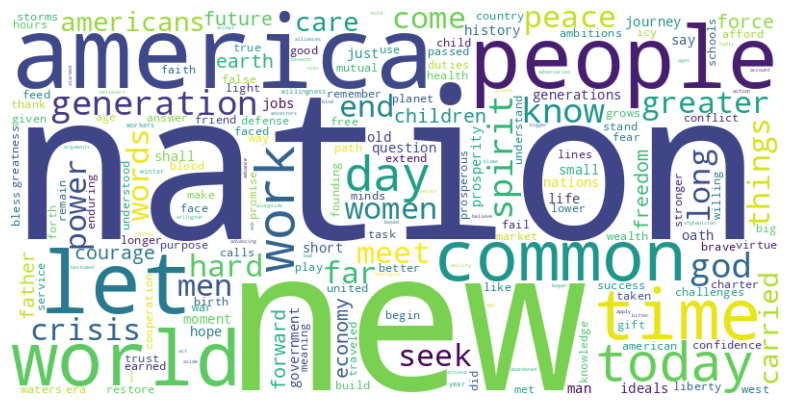

In [28]:
# Display the word cloud
# 워드 클라우드 출력
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

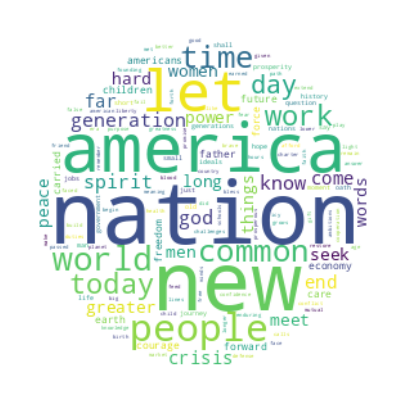

In [29]:
# Generate a circle mask
# 원형 마스크 생성
x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

# Generate the word cloud with the mask
# 마스크를 적용한 워드 클라우드 생성
wordcloud = WordCloud(background_color="white", mask=mask).generate_from_frequencies(word_frequencies)


# Display the word cloud
# 워드 클라우드 출력
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()